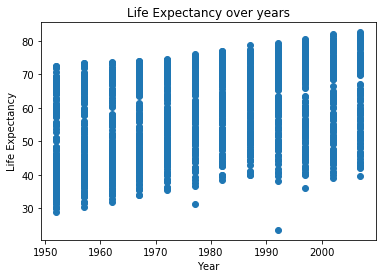

In [77]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jennybc/gapminder/master/data-raw/08_gap-every-five-years.tsv'
data = pd.read_csv(url, sep='\t')
data.head()

#Excercise 1
#This plots the life expectancy of all countries for available years in the dataset
import matplotlib.pyplot as plt
plt.scatter(data.year, data.lifeExp)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy over years')
plt.show()

#Question 1
#There is a general increasing trend that is linear with life expectancy over time

Text(0.5, 1.0, 'Life Expectancy over years')

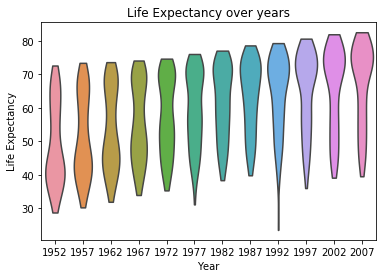

In [2]:
import seaborn as sns
sns.violinplot(x=data.year, y=data.lifeExp, inner=None, cut=0)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy over years')

#Question 2
#The skew of the distribution switches from top skewed to bottom skewed as time progressed.
#All years excpet for 1967 have a unimodal distribution
#None of the years have a distribution that symmetric

#Question 3
#Based on intuition, I reject the null hypothesis of a no relationship

#Question 4
#Based on intuition, the violin plot would not look symmetrical

#Question 5
#According to the assumptions of the linear regression model, the violin plots should look to be 
#centered around a residual value of 0 with a normal distribution 

In [3]:
#Excercise 2
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
np.array(data.year.tolist())
x = np.array(data.year.tolist()).reshape(-1,1)
y = np.array(data.lifeExp.tolist()).reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
intercept = regression_model.intercept_
slope = regression_model.coef_
print('Fitted model: y = ' + str(slope[0][0]) + 'x + ' + str(intercept[0]))

#Question 6
#Life expectancy increases by about 0.325 every year around the world

from sklearn.metrics import r2_score
print(regression_model.score(x, y))

#Question 7
#I reject the null hypothesis that there is no relationship between year and life expectancy. 
#The r squared value is very small (0.189) given the null hypothesis is true

Fitted model: y = 0.3259038276371518x + -585.6521874415448
0.18975713852188814


Text(0.5, 1.0, 'Life expectancy residuals over years')

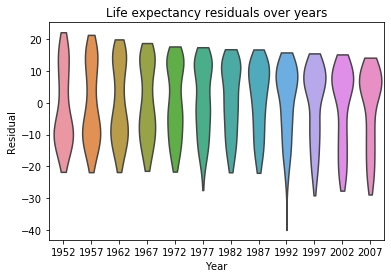

In [4]:
#Excercise 3
residual = y - regression_model.predict(x)
residual = residual.ravel()
sns.violinplot(data.year, residual, inner=None, cut=0)
plt.xlabel('Year')
plt.ylabel('Residual')
plt.title('Life expectancy residuals over years')

#Question 8
#Yes, this plot matches my expectations in Question #4. The residuals are not symmetrical. The distribution 
#of each year is not normal as it is either skewed to the left or to the right .

Text(0.5, 1.0, 'Life expectancy residuals over continents')

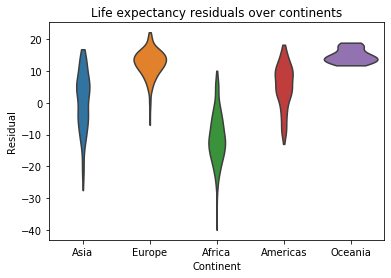

In [5]:
#Excercise 4
sns.violinplot(data.continent, residual, inner=None, cut=0)
plt.xlabel('Continent')
plt.ylabel('Residual')
plt.title('Life expectancy residuals over continents')

#Question 9
#Yes there is a depependence between model residual and continent. Continents that are more centered around 0 and 
#have a more normal distribution are Asia and Americas. Europe and Africa have a normal looking distribution but
#are shifted away from 0. When performing a regression analysis of life expectancy across time we can expect
#a more accurate prediction for Asia and the Americas.

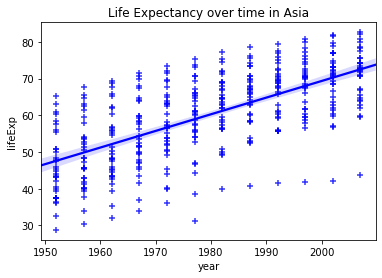

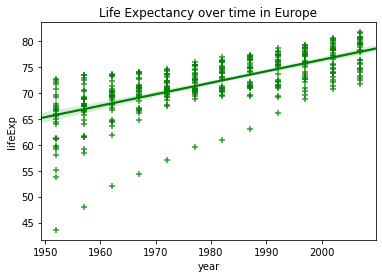

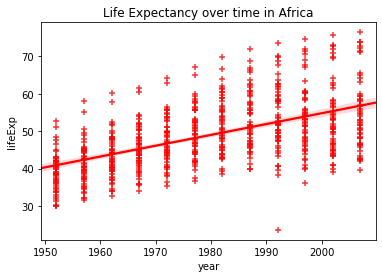

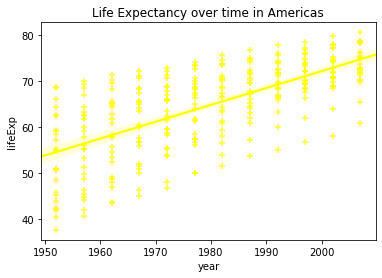

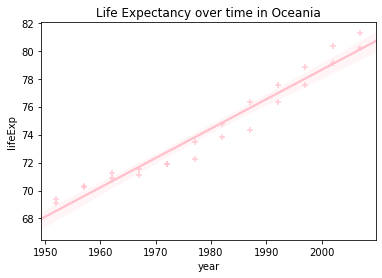

In [6]:
#Excercise 5
#I am grouping year and life expectancy data based on each continent and plotting a 
#linear regression line over it
asia = data.loc[data['continent'] == "Asia"]
p1 = sns.regplot(data=asia, x="year", y="lifeExp", fit_reg=True, marker="+", color="blue",label = 'Asia')
plt.title("Life Expectancy over time in Asia")
plt.show()

europe = data.loc[data['continent'] == "Europe"]
p2 = sns.regplot(data=europe, x="year", y="lifeExp", fit_reg=True, marker="+", color="green",label = 'Europe')
plt.title("Life Expectancy over time in Europe")
plt.show()

africa = data.loc[data['continent'] == "Africa"]
p3 = sns.regplot(data=africa, x="year", y="lifeExp", fit_reg=True, marker="+", color="red",label = 'Africa')
plt.title("Life Expectancy over time in Africa")
plt.show()

americas = data.loc[data['continent'] == "Americas"]
p4 = sns.regplot(data=americas, x="year", y="lifeExp", fit_reg=True, marker="+", color="yellow",label = 'Americas')
plt.title("Life Expectancy over time in Americas")
plt.show()

oceania = data.loc[data['continent'] == "Oceania"]
p5 = sns.regplot(data=oceania, x="year", y="lifeExp", fit_reg=True, marker="+", color="pink",label = 'Oceania')
plt.title("Life Expectancy over time in Oceania")
plt.show()

#Question 10
#Yes the regression model should include an interaction term for continent and year because it is evident 
#that the life expectancy varies based on continent. To group all data points based on continent would provide 
#for more accurate predictions

In [7]:
#Excercise 6
#I made a new table that has new columns of each continent and continent*year
#If that continent has a "1" then that observation is for that continent. It will do the same for continent*year
#This will be the table with interaction terms to provide for more accuracte results
dummy = pd.get_dummies(data['continent'])
temp = pd.concat([data,dummy], axis=1)
temp['africaYear'] = (temp['Africa']) * (temp['year'])
temp['americaYear'] = (temp['Americas']) * (temp['year'])
temp['asiaYear'] = (temp['Asia']) * (temp['year'])
temp['europeYear'] = (temp['Europe']) * (temp['year'])
temp

,country,continent,year,lifeExp,pop,gdpPercap,Africa,Americas,Asia,Europe,Oceania,africaYear,americaYear,asiaYear,europeYear
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,0,0,1,0,0,0,0,1952,0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,0,0,1,0,0,0,0,1957,0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,0,0,1,0,0,0,0,1962,0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,0,0,1,0,0,0,0,1967,0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,0,0,1,0,0,0,0,1972,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,1,0,0,0,0,1987,0,0,0
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,1,0,0,0,0,1992,0,0,0
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,1,0,0,0,0,1997,0,0,0
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,1,0,0,0,0,2002,0,0,0


In [78]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
#I inputted the continent and continent*year data points into an X dataframe and a target variable of 
#life expectancy into y so that they can be put into an ols regression model
x = temp[['year','Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'africaYear', 'americaYear', 'asiaYear', 'europeYear']]
y = temp['lifeExp']

regression = ols(formula = 'lifeExp ~ year + Africa + Americas + Asia + Europe + Oceania + africaYear + americaYear + asiaYear + europeYear', data=temp).fit()
print(regression.summary())

#Question 11
#No, not all parameters in the model are significantly different from zero.
#Given an alpha value of 0.1 the parameters that have a p value greater than this are Oceania, africaYear, 
#and europeYear


<class 'pandas.core.frame.DataFrame'>
                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Mon, 25 Nov 2019   Prob (F-statistic):               0.00
Time:                        18:08:31   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   

In [9]:
#Question 12
#I created dataframes to classify the data by continent. Then I used them to run predictions using the 
#regression model to see how much life expectancy changed each year for each country
africa = temp[temp['continent'] == "Africa"]
xAfrica = africa[['year','Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'africaYear', 'americaYear', 'asiaYear', 'europeYear']]
predictions = regression.predict(xAfrica)
print("Africa life expectancy rate per year: " + str((predictions.iloc[1] - predictions.iloc[0])/(africa.year.iloc[1] - africa.year.iloc[0])))

americas = temp[temp['continent'] == "Americas"]
xAmericas = americas[['year','Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'africaYear', 'americaYear', 'asiaYear', 'europeYear']]
predictions = regression.predict(xAmericas)
print("Smericas life expectancy rate per year: " + str((predictions.iloc[1] - predictions.iloc[0])/(americas.year.iloc[1] - americas.year.iloc[0])))

asia = temp[temp['continent'] == "Asia"]
xAsia = asia[['year','Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'africaYear', 'americaYear', 'asiaYear', 'europeYear']]
predictions = regression.predict(xAsia)
print("Asia life expectancy rate per year: " + str((predictions[1] - predictions[0])/(asia.year[1] - asia.year[0])))

europe = temp[temp['continent'] == "Europe"]
xEurope = europe[['year','Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'africaYear', 'americaYear', 'asiaYear', 'europeYear']]
predictions = regression.predict(xEurope)
print("Europe life expectancy rate per year: " + str((predictions.iloc[1] - predictions.iloc[0])/(europe.year.iloc[1] - europe.year.iloc[0])))

oceania = temp[temp['continent'] == "Oceania"]
xOceania = oceania[['year','Africa', 'Americas', 'Asia', 'Europe', 'Oceania', 'africaYear', 'americaYear', 'asiaYear', 'europeYear']]
predictions = regression.predict(xOceania)
print("Oceania life expectancy rate per year: " + str((predictions.iloc[1] - predictions.iloc[0])/(oceania.year.iloc[1] - oceania.year.iloc[0])))


Africa life expectancy rate per year: 0.28952926304461923
Smericas life expectancy rate per year: 0.36765093706286506
Asia life expectancy rate per year: 0.45312240389912406
Europe life expectancy rate per year: 0.22193214452206575
Oceania life expectancy rate per year: 0.21027237762236836


Text(0.5, 1.0, 'Life expectancy residuals over years')

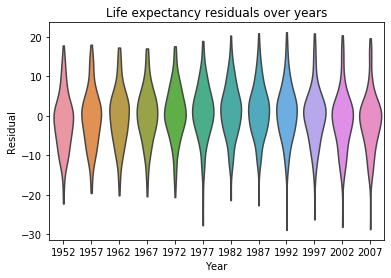

In [10]:
#Question 8
#This is the residual plot for the interaction model. Since it is based on continent, this model 
#matches the assumptions of a linear model very well. The residual is centered around 0 and seems to have
#a normal distribution. All  years also seem to be roughly symmetrical

residual = y - regression.predict(x)
sns.violinplot(temp.year, residual, inner=None, cut=0)
plt.xlabel('Year')
plt.ylabel('Residual')
plt.title('Life expectancy residuals over years')



In [11]:
#Part 2
#Problem 1
# Training data (X, y), T time steps, alpha step
#returns theta (the coefficients) and f (losses)
def grad_descent(X, y, T, alpha):
    m, n = X.shape # m = #examples, n = #features
    theta = np.zeros(n) # initialize parameters
    f = np.zeros(T) # track loss over time
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5*np.linalg.norm(X.dot(theta) - y)**2
        # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*g
    return theta, f


In [79]:
#Problem 3
#Logistic regression stochastic
#Training data (X,y), T time steps, alpha step
#returns theta (the coefficients)
def grad_descent2(X, y, T, alpha):
    theta = np.zeros(X.shape[1]) #initialize parameters
    
    for i in range(T):
        z = np.dot(X,theta)
        predictions = 1 / (1 + np.exp(-1*z)) #sigmoid function
        error = y - predictions
        g = np.dot(X.T, error)
        theta += alpha * g #update coef with gradient
        
    return theta
               

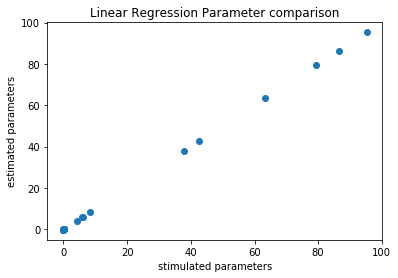

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


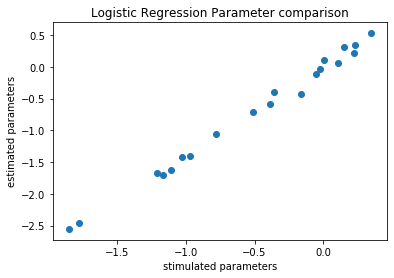

In [81]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression

# Generate data for linear regression:
gen_data_x, gen_data_y = make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

#Linear Regression Comparison
#estimated paramaters are set to the coefficients that the implemented gradient descent linear regression
#function gives 
estimated_params= grad_descent(gen_data_x, gen_data_y, 1000, 0.001)
#simulated parameters are from sklearn's linear regression model
linear_model = LinearRegression()
linear_model.fit(gen_data_x, gen_data_y)
simulation_params = linear_model.coef_
plt.scatter(simulation_params, estimated_params)
plt.xlabel('stimulated parameters')
plt.ylabel('estimated parameters')
plt.title('Linear Regression Parameter comparison')
plt.show()

#Logistic Regression Comparison
#estimated paramaters are set to the coefficients that the implemented gradient descent logistic regression
#function gives 
estimated_log_params = grad_descent2(log_gen_data_x, log_gen_data_y, 1000, 0.001)
#simulated parameters are from sklearn's logistic regression model
log_model = LogisticRegression()
log_model.fit(log_gen_data_x, log_gen_data_y)
simulation_log_params = log_model.coef_
plt.scatter(simulation_log_params, estimated_log_params)
plt.xlabel('stimulated parameters')
plt.ylabel('estimated parameters')
plt.title('Logistic Regression Parameter comparison')
plt.show()

#From these plots, the simulated and estimated parameters from the gradient descent functions that were made
#and sklearn seem to be pretty similar. These points lined up to be visually linear which means the gradient 
#descent function was a good estimator for true parameters

In [142]:
#Try it out with custom dataset
#Forest fires in Brazil from kaggle.com
df = pd.read_csv("amazon.csv", encoding = "ISO-8859-1")
df = df.head(500)

#tidying data
#convert state and month to a number so it'll be easier for data analysis later
state_num = {'Acre': 1,'Alagoas': 2, 'Amapa' : 3}
month_num = {'Janeiro': 1,'Fevereiro': 2, 'Março': 3, 'Abril': 4, 'Maio': 5, 'Junho': 6, 'Julho': 7,
            'Agosto': 8, 'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12,}
df.state = [state_num[item] for item in df.state]
df.month = [month_num[item] for item in df.month]
#convert number column from float to int
df['number'] = df['number'].apply(np.int64)
df

,year,state,month,number,date
0,1998,1,1,0,1998-01-01
1,1999,1,1,0,1999-01-01
2,2000,1,1,0,2000-01-01
3,2001,1,1,0,2001-01-01
4,2002,1,1,0,2002-01-01
...,...,...,...,...,...
495,2014,3,1,10,2014-01-01
496,2015,3,1,14,2015-01-01
497,2016,3,1,19,2016-01-01
498,2017,3,1,2,2017-01-01


In [143]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

#comparing year and the number of fires to the state that the fire occured in
X = df[['year', 'number']]
y = df['state']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [144]:
from sklearn.model_selection import cross_val_score

#KNN Classification
knn = KNeighborsClassifier(n_neighbors=10)
hyper_params = knn.get_params()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)

#10 fold cross validation for knn classifier
kf = KFold(10, False)
knn_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print("KNN Hyper params: ", hyper_params)
print("KNN Scores: ", knn_scores)
print("KNN mean scores", knn_scores.mean())


KNN Hyper params:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
KNN Scores:  [0.56 0.64 0.48 0.86 0.56 0.72 0.26 0.06 0.66 0.38]
KNN mean scores 0.518


In [145]:
#10 fold validation for logistic regression gradient descent
kf = KFold(10, False)
logreg_scores = []
for train, test, in kf.split(y):
    X_train = np.array(X)[train]
    y_train = np.array(y)[train]
    X_test = np.array(X)[test]
    y_test = np.array(y)[test]
    theta = grad_descent2(X_train, y_train, 1000, 0.001)
    output = (1 / (1 + np.exp(-1*(X_test.dot(theta))))) >= 0.5
    logreg_scores += [(output == y_test).mean()]
    
logreg_scores = np.array(logreg_scores)
print("Logistic regression scores: ", logreg_scores)
print("Logistic regression mean scores: ", logreg_scores.mean())

Logistic regression scores:  [1.   1.   1.   1.   0.78 0.   0.   0.   0.   0.  ]
Logistic regression mean scores:  0.47800000000000004


In [148]:
from sklearn import svm
#Linear SVM

lin_svm = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
hyper_params = lin_svm.get_params()
score = lin_svm.score(X_test, y_test) 

#10 fold cross validation for linear svm
kf = KFold(10, False)
svm_scores = cross_val_score(lin_svm, X, y, cv=kf, scoring='accuracy')
print("Linear SVM Hyper params: ", hyper_params)
print("Linear SVM Scores: ", svm_scores)
print("Linear SVM mean scores: ", svm_scores.mean())

Linear SVM Hyper params:  {'C': 1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Linear SVM Scores:  [0.   0.   0.16 0.3  0.22 0.   0.   0.   0.   0.24]
Linear SVM mean scores:  0.092


In [149]:
#Paired T-test
from scipy import stats

#Logistic regression vs knn classifier
test1 = stats.ttest_rel(knn_scores, logreg_scores)
test2 = stats.ttest_rel(svm_scores, logreg_scores)
print("KNN vs logistic reg T-Test: ", test1)
print("Linear SVM vs logistic reg T-Test: ", test2)

#If p values are greater than or equal to 0.05, the results between two datasets are not significantly different
#The p value from the paired t-test between the knn model and the implement logistic regression is higher that 0.05
#which means the results are not significantly different
#The p value from the paired t-test between the linear svm model and the logistic regression is lower than 0.05 
#which means the results were significantly different

KNN vs logistic reg T-Test:  Ttest_relResult(statistic=0.2816559982784686, pvalue=0.784576246059267)
Linear SVM vs logistic reg T-Test:  Ttest_relResult(statistic=-2.5410138927989885, pvalue=0.03165807412271533)


In [151]:
#10 fold cv error estimate
knn_error = stats.sem(knn_scores)
linsvm_error = stats.sem(svm_scores)
logreg_error = stats.sem(logreg_scores)
print("KNN error: ", knn_error)
print("Linear SVM error: ", linsvm_error)
print("Logistic Regression error: ", logreg_error)

KNN error:  0.07402402012560218
Linear SVM error:  0.03900997023554078
Logistic Regression error:  0.1606777312925887
